# GUTS-RNA-pulse 3.6c substance independent

## Problem formulation

Risk assessment of chemicals needs to get away from making retrospective assessments after evaluating the effects of chemicals on ecosystems or on individuals to derive safe test concentrations. This need is one hand mandated by the desire for healthy ecosystems, the precautionary principle and ethical considerations to reduce animal testing.

With this model we investigate the potential to integrate omics data into the existing general unified threshold model for survival (GUTS) [Jager.2011, Jager.2018], which is considered ready for use in environmental risk assessment [EFSA.2018].

The growing availability of 'omics data drives the abstraction of bio-physical insights into the processes that govern molecular responses to changing environments.
The integration of 'omics data into mechanistic models therefore offers a promising solution for advancing risk assessment for chemicals and chemical mixtures, because in theory it can connect the cellular processes induced after toxicant exposure with observed effects in the organism [Perkins.2019,Murphy.2018].
Integrating such approaches into existing mechanistic modeling frameworks envisions the prediction of toxicant effects for untested species--substance combinations and mixtures as a very desirable long-term goal for a predictive environmental risk assessment.

The GUTS-RNA-pulse model is the first approach to integrate time-resolved gene-expression data (Nrf2 fold-change) into a GUTS model. 

### Target audience | model aims

It is aimed at researchers in the field of environmental risk assessment. It is in an early stage of scientific development and serves as a proof of principle. The model is designated to investigate the process dynamics and the interplay between chemical uptake and metabolization and their interactions with gene-expression dynamics. 

The aim of the model is to obtain a better understanding on modeling the temporal dynamics from exposure to effect with multiple intermediate steps. Incorporation of intermediate steps in the model fitting, forces the modellers to incorporate more realistic assumptions of biological processes and step-by-step move to better approximations of the reality.

### Operability range

It can be used to extrapolate internal concentrations, Nrf2 fold-changes, survival rates forward in time and for untested concentrations. The model it is not ready to be used outside of the range of the calibrated chemicals and should not be used for predictions of untested chemicals. 


## Model description

### Synopsis

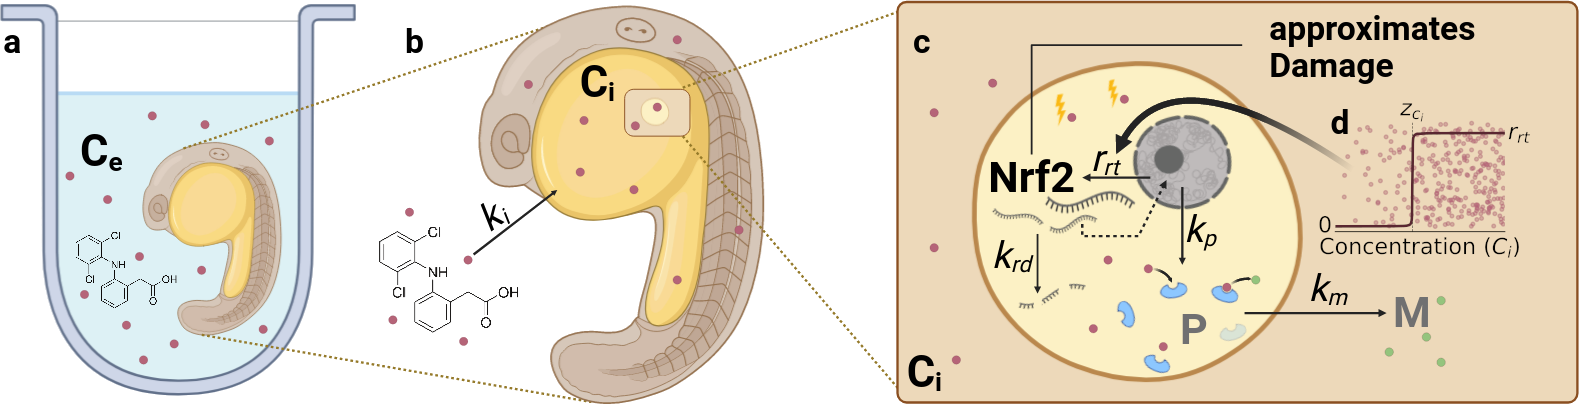

The model RNA-pulse describes the damage dynamic as a gene-expression pulse that is calibrated on *nrf2* expression data. It uses a sigmoid function to model the threshold dependent activation of *nrf2* expression and a concentration dependent exponential decay of *nrf2* molecules. Coupled with active metabolization of the internal concentration of the chemical this leads to a pulse like behavior. In addition *nrf2* serves as a proxy for toxicodynamic damage in the standard GUTS survival model of stochastic death.

### Detailed model description

$$
\begin{align}
\frac{dC_i}{dt} &= k_i~C_e - k_m~C_i~P \\
\frac{dR}{dt} &= r_{rt}~\text{activation}(C_i,~C_{i,max},~ z_{ci},~ v_{rt}) - k_{rd} ~ (R - R_0) \\
\frac{dP}{dt} &= k_p~ ((R - R_0) - P) \\
h(t) &= k_k~ max(0, R(t) - z) +  h_b \\
S(t) &= e^{-\int_0^t h(t) dt}
\end{align}
$$

#### Uptake and elimination kinetics

Uptake and elimination kinetics (Eq. 1) are determined by the uptake rate constant $k_i$, which exclusively depends on the external concentration $C_e$. Although external concentrations were measured for those datasets where internal concentrations were available, a we chose not to model uptake from the environment and decay, because the observed environmental concentrations were relatively stable and Diuron and Naproxen are known to be stable compounds [Giacomazzi.2004,Wojcieszynska.2020] and Diclofenac has a DT50 of 8 days, but was also observed stable in the experiments.

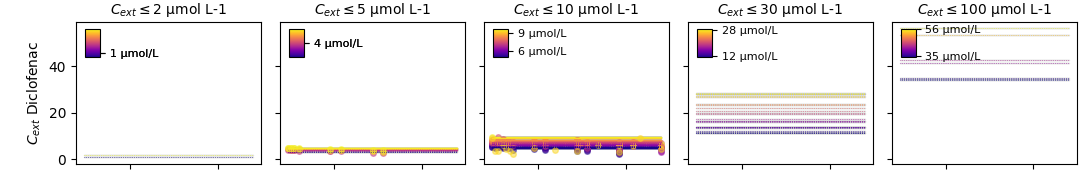
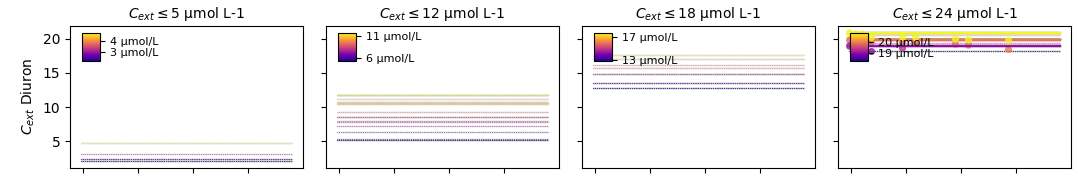
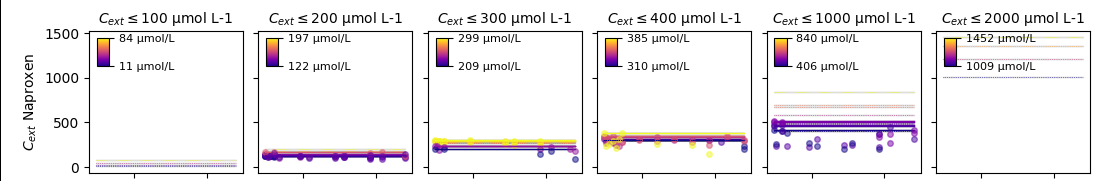

#### Gene expression and decay

While internal concentrations varied over 3 orders of magnitude between the different substances, *nrf2* expression varied within 1 order of magnitude. This observations are in line with the understanding that gene-transcription follows zero order kinetics [Qiu.2022,Xu.2023a], which effectively decouples it from the magnitude of the internal concentrations. In addition, *nrf2* expression showed pulse like patterns, which elicits the inclusion of a deactivation of expression. This combined process of *nrf2* transcription, we therefore chose to model as a zero order kinetic, activated by a concentration dependent sigmoid function.

$$activation(C_i,~C_{i,max},~z_{ci}, ~v_{rt}) = 0.5 + \frac{1}{\pi} ~ arctan(v_{rt} ~ (\frac{C_i}{C_{i,max}} - z_{ci}))$$

where the threshold $z_{ci}$ and slope $v_{rt}$ are fittable parameters. This process is also illustrated in the graphical model description and understands that there is a maximum cellular capacity for expression of the *nrf2* gene. The activation of expression however is concentration dependent.

RNA decay is modeled as a first-order kinetic decay equation, which is in agreement with concentionally applied RNA decay models [Chen.2008,Blake.2024].

With the assumptions of a threshold-triggered activation of 0th-order gene-transcription (expression) and 1st order RNA-decay, the model is capable of increasing RNA-concentration after exposure to toxicants and depleting it again after the concentration falls below a threshold. Because the concentration of RNA-expression is indirectly coupled to the elimination of the compound, various patterns of internal concentration dynamics and gene-expression dynamics under constant exposure concentrations can be modeled:

#### Protein dynamics

#### Survival functions

### Model parameters

TKTD Parameters used in the GUTS-RNA-pulse model. The column `Assumed substance independence` indicates whether a parameter is supposed to be shared for multiple  substances.
| Parameter              | Definition | Unit | Assumed substance independence  |
|------------------------|------------|------|---------------------------------|
| ${k}_{i}$              | Uptake rate constant of the chemical into the internal compartment of the ZFE | $h^{-1}$ | no  |
| ${k}_{m}$              | Metabolization rate constant from the internal compartment of the ZFE| $\frac{L}{\mu mol~h}$ | no  |
| ${z}_{\text{ci}}$      | Scaled internal concentration threshold for the activation of *nrf2* expression | $\frac{\mu mol~L^{-1}}{\mu mol~L^{-1}}$ | no  |
| ${v}_{\text{rt}}$      | Scaled responsiveness of the *nrf2* activation (slope of the activation function) | $\frac{\mu mol~L^{-1}}{\mu mol~L^{-1}}$ | yes/no $^a$  |
| ${r}_{\text{rt}}$      | Constant *nrf2* expression rate after activation $^b$ | fc $^c$ | yes  |
| ${k}_{\text{rd}}$      | Nrf2 decay rate constant | $h^{-1}$ | yes  |
| ${k}_{p}$              | Dominant rate constant of synthesis and decay of metabolizing proteins | $h^{-1}$ | yes  |
| ${z}$                  | Effect *nrf2*-threshold of the hazard function $^b$ | fc $^c$ | yes  |
| ${k}_{k}$              | killing rate constant for *nrf2* $^b$ | $fc^{-1}~h^{-1}$ $^c$ | yes |
| ${h}_{b}$              | background hazard rate constant | $h^{-1}$ | yes  |
| $\sigma_{\text{cint}}$ | Log-normal error of the internal concentration | | yes  |
| $\sigma_{nrf2}$        | Log-normal error of the *nrf2* expression $^b$ | | yes  |

a: In an unscaled version of the activation function, $v_{rt}$ is not considered substance independent, due to an inverse relationship between $v_{rt}$ and $C_{i,max}$ 

b: relative to the *nrf2* concentration in untreated ZFE (fold-change)

c: fold change: $\frac{\mu mol~Nrf2\text{-treatment}~L^{-1}}{\mu mol~Nrf2\text{-control}~L^{-1}}$ 

### 💥 Attention

1. When calculating treatment effects it should be made sure that effects are calculated differentially to the initial value of the RNA expression
2. When $R_0 \neq 1$, the RNA expression has to be divided by the baseline to obtain fold-change values, after the ODE has been solved.


## Implementation

For the implementation of the model the package `pymob` was developed. Pymob is publically available on github https://github.com/flo-schu/pymob and deployed on PyPi https://pypi.org/project/pymob/. The documentation for pymob is available on https://pymob.readthedocs.io/en/latest/


In [1]:
import os
import json
import warnings
from functools import partial

import numpy as np
import arviz as az
import matplotlib as mpl
from matplotlib import pyplot as plt

from pymob.utils.store_file import prepare_casestudy

# Ignore warnings and change working directory to the root of the case study
warnings.filterwarnings("ignore")
if not os.path.exists("./case_studies"): os.chdir("../../..")

The model described above is specified in the pymob framework in the function `from case_studies.tktd_rna_pulse.mod import tktd_rna_3_6c`

In [2]:
config = prepare_casestudy(
    case_study=("tktd_rna_pulse", "rna_pulse_3_6c_substance_specific"),
    config_file="settings.cfg"
)
from case_studies.tktd_rna_pulse.sim import SingleSubstanceSim2
from case_studies.tktd_rna_pulse.prob import model_rna_pulse_3_6c_substance_specific
from case_studies.tktd_rna_pulse.mod import tktd_rna_3_6c

In [3]:
sim = SingleSubstanceSim2(config=config)

sim.model = tktd_rna_3_6c

MinMaxScaler(variable=cext, min=0.0, max=514.382187237679)
MinMaxScaler(variable=cint, min=0.0, max=6364.836264471382)
MinMaxScaler(variable=nrf2, min=0.0, max=3.806557074337876)
MinMaxScaler(variable=survival, min=0.0, max=18.0)


## Parameter inference

Parameter inference estimates the value of the parameters given the data 
presented to the model.

Here we calculate a maximum a posteriori (MAP) estimate which is the mode
of the posterior distribution.

In [4]:
# set up the inferer properly
sim.coordinates["time"] = sim.observations.time.values
sim.set_inferer("numpyro")


First of all prior predictions are generated. These are helpful to diagnose
the model and also to compare posterior parameter estimates with the prior
distributions. If there is a large bias, this information can help to achieve
a better model fit. We can speed up the prior predictive sampling, if we let
the model only sample the prior distributions `only_prior=True`

In [5]:
# set the inference model
sim.coordinates["time"] = sim.observations.time.values
sim.inferer.inference_model = partial(model_rna_pulse_3_6c_substance_specific, only_prior=True)

# prior predictions
seed = int(np.random.random_integers(0, 100, 1))
prior_predictions = sim.inferer.prior_predictions(n=4000, seed=seed)

C_{i, max}: [1757.0, 168.1, 6364.8]


In the next step, we take the full model, including deterministic ODE solution
and error model and run our MAP estimator on it, with the parameters that have
been setup before.

C_{i, max}: [1757.0, 168.1, 6364.8]
       Trace Shapes:         
        Param Sites:         
       Sample Sites:         
       k_i_norm dist      3 |
               value      3 |
      r_rt_norm dist      3 |
               value      3 |
      r_rd_norm dist      3 |
               value      3 |
      z_ci_norm dist      3 |
               value      3 |
       k_p_norm dist      3 |
               value      3 |
       k_m_norm dist      3 |
               value      3 |
         z_norm dist      3 |
               value      3 |
      v_rt_norm dist      3 |
               value      3 |
       h_b_norm dist      3 |
               value      3 |
        kk_norm dist      3 |
               value      3 |
sigma_cint_norm dist      3 |
               value      3 |
sigma_nrf2_norm dist      3 |
               value      3 |
       cint_obs dist 202 23 |
               value 202 23 |
       nrf2_obs dist 202 23 |
               value 202 23 |
   survival_obs dist 202 23 |
    

100%|██████████| 2000/2000 [01:04<00:00, 30.90it/s, init loss: 4390.9336, avg. loss [1901-2000]: 2867.8660]
arviz - WARNING - Shape validation failed: input_shape: (1, 1), minimum_shape: (chains=1, draws=4)


                 mean  sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
h_b[0]          0.000 NaN   0.000    0.000        NaN      NaN       NaN   
h_b[1]          0.000 NaN   0.000    0.000        NaN      NaN       NaN   
h_b[2]          0.000 NaN   0.000    0.000        NaN      NaN       NaN   
k_i[0]          4.442 NaN   4.442    4.442        NaN      NaN       NaN   
k_i[1]          0.592 NaN   0.592    0.592        NaN      NaN       NaN   
k_i[2]          0.268 NaN   0.268    0.268        NaN      NaN       NaN   
k_m[0]          1.579 NaN   1.579    1.579        NaN      NaN       NaN   
k_m[1]          0.082 NaN   0.082    0.082        NaN      NaN       NaN   
k_m[2]          0.024 NaN   0.024    0.024        NaN      NaN       NaN   
k_p[0]          0.009 NaN   0.009    0.009        NaN      NaN       NaN   
k_p[1]          0.436 NaN   0.436    0.436        NaN      NaN       NaN   
k_p[2]          0.008 NaN   0.008    0.008        NaN      NaN       NaN   
kk[0]       

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> observed_data

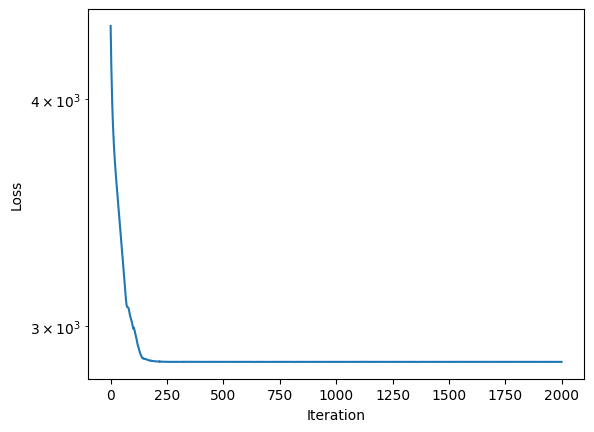

In [6]:
# set the inference model
sim.config.set("inference.numpyro", "kernel", "map")
sim.config.set("inference.numpyro", "svi_iterations", "2000")
sim.config.set("inference.numpyro", "svi_learning_rate", "0.01")
sim.coordinates["time"] = sim.observations.time.values
sim.inferer.inference_model = partial(model_rna_pulse_3_6c_substance_specific, only_prior=False)
sim.inferer.run()

# show (and explore idata)
sim.inferer.idata

## Posterior predictions

In order to evaluate the goodness of fit for the posteriors, we are looking
at the posterior predictions.

In order to obtain smoother trajectories, the time resolution is increased,
and posterior predictions are calculated.

In [7]:
sim.coordinates["time"] = np.linspace(24, 120, 100)
sim.config.set("inference", "n_predictions", "1")
seed = int(np.random.random_integers(0, 100, 1))

res = sim.inferer.posterior_predictions(n=1, seed=seed).mean(("draw", "chain"))
res

Posterior predictions: 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]


<xarray.Dataset>
Dimensions:    (id: 202, time: 100)
Coordinates:
  * id         (id) object '101_0' '101_1' '106_0' ... '66_4' '66_5' '6_0'
  * time       (time) float64 24.0 24.97 25.94 26.91 ... 117.1 118.1 119.0 120.0
Data variables:
    P          (id, time) float32 0.0 0.0004931 0.001594 ... 1.29 1.322 1.353
    cext       (id, time) float32 2.34 2.34 2.34 2.34 ... 349.5 349.5 349.5
    cint       (id, time) float32 0.0 10.08 20.13 ... 4.807e+03 4.75e+03
    lethality  (id, time) float32 0.0 0.0 0.0 0.0 ... 0.9223 0.9294 0.9358
    nrf2       (id, time) float32 1.0 1.103 1.152 1.175 ... 6.42 6.415 6.405
    survival   (id, time) float32 1.0 1.0 1.0 1.0 ... 0.07774 0.07062 0.06417

Next, we plot the predictions against selected experiments. Note that the observations,
may be slightly diverging from the MAP predictions, because
a) the model is not completely correct
b) other data *pull* the posterior estimate away from the displayed data.

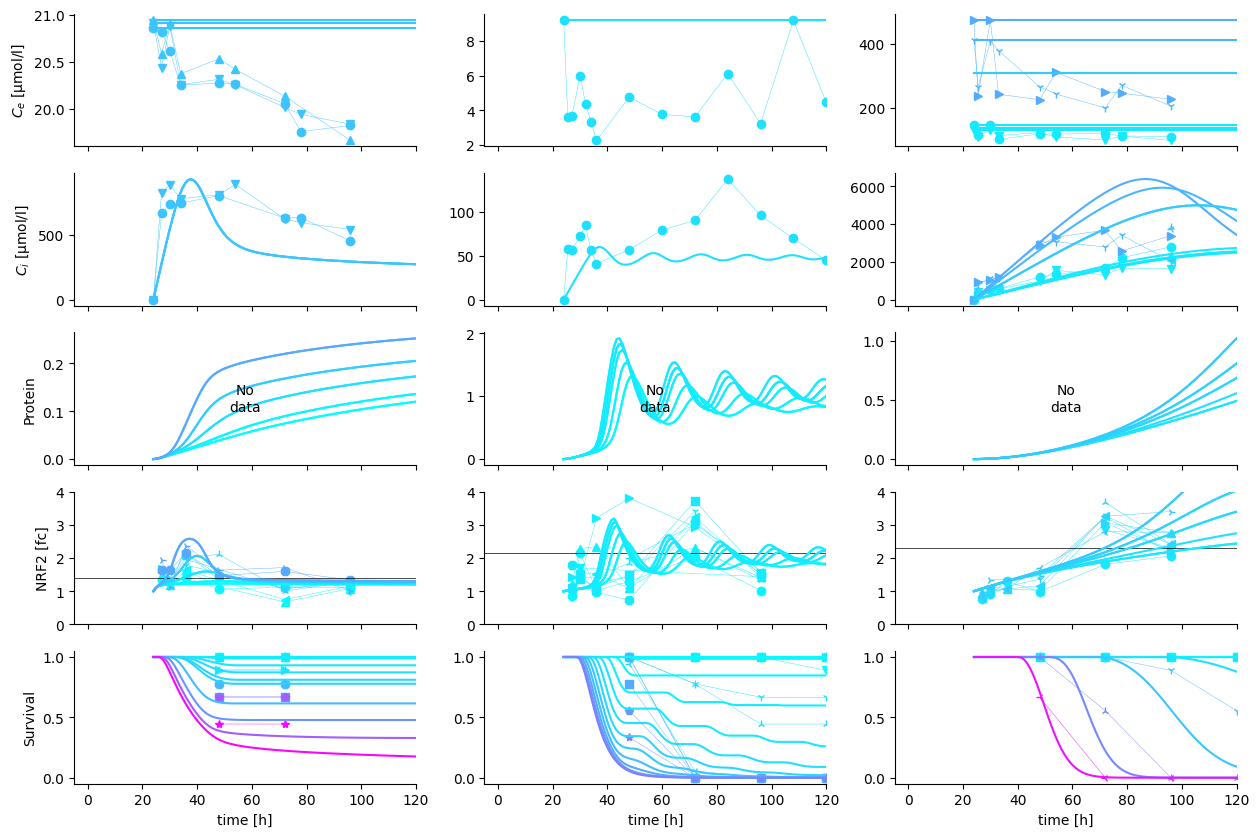

In [8]:
with open(sim.scenario_path + "/experiment_selection_1.json", "r") as fp:
    data_structure = json.load(fp)
    
res = res.assign_coords({"substance": sim.observations.substance})
cmap = mpl.colormaps["cool"]
fig, axes = plt.subplots(len(data_structure), 3, sharex=True, figsize=(15,10))


for r, (v, vdict) in enumerate(data_structure.items()):
    for c, (s, sdict) in enumerate(vdict["substances"].items()):
        sdata = sim.observations.where(sim.observations.substance == s, drop=True)
        C = np.round(sdata.cext_nom.values, 1)
        norm = mpl.colors.Normalize(vmin=C.min(), vmax=C.max())
        for eid in sdict["experiment_ids"]:

            ax, meta, obs_ids, _ = sim.mplot.plot_experiment(
                self=sim,
                experiment_id=eid,
                substance=s,
                data_var=v,
                cmap=cmap,
                norm=norm,
                ax=axes[r, c]
            )

            if v != "survival":
                ax.set_xlabel("")

            if v == "P":
                ax.set_ylabel("Protein")
                ax.spines[["right", "top"]].set_visible(False)

            if v == "nrf2":
                ax.set_ylim(0, 4)
                # note that the thresholds are mixed up. Diuron and Diclofenac should swap
                z = sim.inferer.idata.posterior.z.mean(("chain", "draw")).values
                ax.hlines(z[c], -10, 120, color="black", lw=0.5)

            if c != 0:
                ax.set_ylabel("")

            l = ax.get_legend()
            if l is not None:
                l.remove()
            ax.set_title("")

            res_ids = sim.get_ids(res, {"substance": s, "experiment_id": eid})

            for i in res_ids:
                y = res.sel(id=i)
                ax.plot(res.time, y[v], color=cmap(norm(y.cext.isel(time=0))))


In the combined model (tktd_rna_3_1), especially NRF2 of Naproxen converges on an
incorrect model dynamic. This is caused (I'm sure) by the substance-indepdendent
threshold parameter $z$ and killing rate $k_k$

## Compare prior and posterior distributions to diagnose biases

We can also look at the prior distributions and the MAP estimate of the posterior
parameter distribution, to assess, whether we are influencing the fit by 
providing a prior that is very far away from the posterior estimate.

In this case-study, the priors should have only a small effect, because of the
large amount of data. Still it is better to be sure.

Since, the parameters are on vastly different scales, they are displayed on the
log-axis.

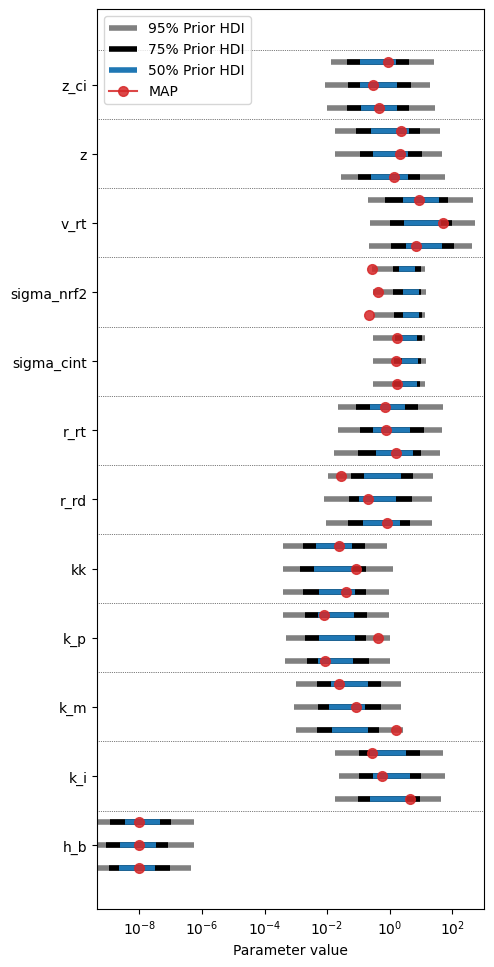

In [9]:
# mpl.use('TkAgg')

substances = sim.observations.attrs["substance"]
priors = prior_predictions.prior.stack(sample=("chain", "draw"))
posteriors = sim.inferer.idata.posterior

hdi_priors_50 = np.exp(az.hdi(np.log(prior_predictions.prior), hdi_prob=0.50))
hdi_priors_75 = np.exp(az.hdi(np.log(prior_predictions.prior), hdi_prob=0.75))
hdi_priors_95 = np.exp(az.hdi(np.log(prior_predictions.prior), hdi_prob=0.95))

fig, ax = plt.subplots(1, 1, figsize=(5, 10))

prior_names = list(priors.data_vars.keys())
xmax = hdi_priors_95.max().to_array().max() * 2
xmin = hdi_priors_95.min().to_array().min() * 2

for k, (key, prior) in enumerate(priors.data_vars.items()):
    nsubstance = len(prior.coords[f"{key}_dim_0"])
    for i in range(nsubstance):
        if nsubstance == 1:
            y = 1
        else:
            y = i

        y_ = k + (y/3 - 1/3)
        h95 = hdi_priors_95[key].isel({f"{key}_dim_0": i})
        h75 = hdi_priors_75[key].isel({f"{key}_dim_0": i})
        h50 = hdi_priors_50[key].isel({f"{key}_dim_0": i})
        posterior_estimate = posteriors[key].mean(("chain", "draw"))
        map_ = posterior_estimate.isel({f"{key}_dim_0": i})

        ax.hlines(y_, *h95, lw=4, color="grey")
        ax.hlines(y_, *h75, lw=4, color="black")
        ax.hlines(y_, *h50, lw=4, color="tab:blue")
        ax.plot(map_, y_, color="tab:red", ms=7, alpha=.85, marker="o")
        if i == 0:
            ax.hlines(k + 0.5, xmin, xmax, ls="dotted", lw=.5, color="black")

ax.set_xscale("log")
ax.set_xlabel("Parameter value")
ax.set_yticks(range(len(prior_names)))
ax.set_yticklabels(prior_names, minor=False)
ax.set_xlim(xmin, xmax)
ax.hlines([], [], [], lw=4, color="grey", label="95% Prior HDI")
ax.hlines([], [], [], lw=4, color="black", label="75% Prior HDI")
ax.hlines([], [], [], lw=4, color="tab:blue", label="50% Prior HDI")
ax.plot([], [], ms=7, alpha=.85, marker="o", color="tab:red", label="MAP")
ax.legend()

fig.subplots_adjust(top=0.95, bottom=0.05)
fig.savefig(f"{sim.output_path}/prior_posterior.png")

## Model evaluation

